Sähkönkulutus Suomessa - avoimen datan projekti.
Sähkönkulutusaineisto, jossa tiedot tunneittain yksikössä MWh/h: https://data.fingrid.fi/fi/dataset/electricity-consumption-in-finland
Muunnan nämä megawattitunnit kilowattitunneiksi, koska haluan tässä projektissa tarkastella hintoja en niinkään teollisuuden vaan kuluttajan näkökulmasta ja siksi pienempi yksikkö.
Esimerkiksi Ruoanlaitto liedellä/uunilla vie energiaa 1,5-2,0 kWh tai 1,5h saunominen vie energiaa 8,00 kWh.
Ladattu omalle laitteelle tiedot vuoden 2022 kuukausilta omina tiedostoinaan tammikuu - heinäkuu.
Voidaan käyttää myös ladattua tiedostoa, jossa kaikki tiedot tammikuu - heinäkuu.


Asetukset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Ladataan dataset tammikuu - heinäkuu.

In [2]:
# ISO-8859-1 merkistöllä voidaan halutessa lukea suomen kielistä tekstiä, eli parametriksi encoding='ISO-8859-1'
df = pd.read_csv("datasets/sahkonkulutus/consumption_perHour_fromJantoJuly.csv")
df.dtypes


Alkuaika UTC               object
Lopetusaika UTC            object
Alkuaika UTC+03:00         object
Lopetusaika UTC+03:00      object
Sähkönkulutus Suomessa    float64
dtype: object

In [3]:
df

,Alkuaika UTC,Lopetusaika UTC,Alkuaika UTC+03:00,Lopetusaika UTC+03:00,Sähkönkulutus Suomessa
0,2021-12-31 21:00:00,2021-12-31 22:00:00,2022-01-01 00:00:00,2022-01-01 01:00:00,10738.0
1,2021-12-31 22:00:00,2021-12-31 23:00:00,2022-01-01 01:00:00,2022-01-01 02:00:00,10376.0
2,2021-12-31 23:00:00,2022-01-01 00:00:00,2022-01-01 02:00:00,2022-01-01 03:00:00,10018.0
3,2022-01-01 00:00:00,2022-01-01 01:00:00,2022-01-01 03:00:00,2022-01-01 04:00:00,9773.0
4,2022-01-01 01:00:00,2022-01-01 02:00:00,2022-01-01 04:00:00,2022-01-01 05:00:00,9648.0
...,...,...,...,...,...
5083,2022-07-31 16:00:00,2022-07-31 17:00:00,2022-07-31 19:00:00,2022-07-31 20:00:00,7660.0
5084,2022-07-31 17:00:00,2022-07-31 18:00:00,2022-07-31 20:00:00,2022-07-31 21:00:00,7625.0
5085,2022-07-31 18:00:00,2022-07-31 19:00:00,2022-07-31 21:00:00,2022-07-31 22:00:00,7351.0
5086,2022-07-31 19:00:00,2022-07-31 20:00:00,2022-07-31 22:00:00,2022-07-31 23:00:00,7567.0


In [4]:
# Siivotaan dataa
# Poistetaan puuttuvat tiedot
df = df.dropna()

# tämä näyttää duplikaatit
#df["is_duplicate"]= df.duplicated()
 
# tämä poistaa duplikaatit
# df.drop_duplicates(inplace = True)
df

,Alkuaika UTC,Lopetusaika UTC,Alkuaika UTC+03:00,Lopetusaika UTC+03:00,Sähkönkulutus Suomessa
0,2021-12-31 21:00:00,2021-12-31 22:00:00,2022-01-01 00:00:00,2022-01-01 01:00:00,10738.0
1,2021-12-31 22:00:00,2021-12-31 23:00:00,2022-01-01 01:00:00,2022-01-01 02:00:00,10376.0
2,2021-12-31 23:00:00,2022-01-01 00:00:00,2022-01-01 02:00:00,2022-01-01 03:00:00,10018.0
3,2022-01-01 00:00:00,2022-01-01 01:00:00,2022-01-01 03:00:00,2022-01-01 04:00:00,9773.0
4,2022-01-01 01:00:00,2022-01-01 02:00:00,2022-01-01 04:00:00,2022-01-01 05:00:00,9648.0
...,...,...,...,...,...
5083,2022-07-31 16:00:00,2022-07-31 17:00:00,2022-07-31 19:00:00,2022-07-31 20:00:00,7660.0
5084,2022-07-31 17:00:00,2022-07-31 18:00:00,2022-07-31 20:00:00,2022-07-31 21:00:00,7625.0
5085,2022-07-31 18:00:00,2022-07-31 19:00:00,2022-07-31 21:00:00,2022-07-31 22:00:00,7351.0
5086,2022-07-31 19:00:00,2022-07-31 20:00:00,2022-07-31 22:00:00,2022-07-31 23:00:00,7567.0


Ensimmäiselle 3 riville tuli mukaan viime vuoden dataa joten siivotaan vielä dataframea niiden verran.

In [5]:
df = df.iloc[3:]
df

,Alkuaika UTC,Lopetusaika UTC,Alkuaika UTC+03:00,Lopetusaika UTC+03:00,Sähkönkulutus Suomessa
3,2022-01-01 00:00:00,2022-01-01 01:00:00,2022-01-01 03:00:00,2022-01-01 04:00:00,9773.0
4,2022-01-01 01:00:00,2022-01-01 02:00:00,2022-01-01 04:00:00,2022-01-01 05:00:00,9648.0
5,2022-01-01 02:00:00,2022-01-01 03:00:00,2022-01-01 05:00:00,2022-01-01 06:00:00,9585.0
6,2022-01-01 03:00:00,2022-01-01 04:00:00,2022-01-01 06:00:00,2022-01-01 07:00:00,9680.0
7,2022-01-01 04:00:00,2022-01-01 05:00:00,2022-01-01 07:00:00,2022-01-01 08:00:00,9859.0
...,...,...,...,...,...
5083,2022-07-31 16:00:00,2022-07-31 17:00:00,2022-07-31 19:00:00,2022-07-31 20:00:00,7660.0
5084,2022-07-31 17:00:00,2022-07-31 18:00:00,2022-07-31 20:00:00,2022-07-31 21:00:00,7625.0
5085,2022-07-31 18:00:00,2022-07-31 19:00:00,2022-07-31 21:00:00,2022-07-31 22:00:00,7351.0
5086,2022-07-31 19:00:00,2022-07-31 20:00:00,2022-07-31 22:00:00,2022-07-31 23:00:00,7567.0


Siivotaan vielä ylimääräiset aihevyöhyke sarakkeet pois, käytetään pelkkää UTC+3 aikaa (kesäaika)

In [6]:
del df['Alkuaika UTC']
del df['Lopetusaika UTC']
df

,Alkuaika UTC+03:00,Lopetusaika UTC+03:00,Sähkönkulutus Suomessa
3,2022-01-01 03:00:00,2022-01-01 04:00:00,9773.0
4,2022-01-01 04:00:00,2022-01-01 05:00:00,9648.0
5,2022-01-01 05:00:00,2022-01-01 06:00:00,9585.0
6,2022-01-01 06:00:00,2022-01-01 07:00:00,9680.0
7,2022-01-01 07:00:00,2022-01-01 08:00:00,9859.0
...,...,...,...
5083,2022-07-31 19:00:00,2022-07-31 20:00:00,7660.0
5084,2022-07-31 20:00:00,2022-07-31 21:00:00,7625.0
5085,2022-07-31 21:00:00,2022-07-31 22:00:00,7351.0
5086,2022-07-31 22:00:00,2022-07-31 23:00:00,7567.0


Muunnan megawattitunnit kilowattitunneiksi. Megawatti = 1 000 kW.

In [7]:
df['Sähkönkulutus Suomessa'] = df['Sähkönkulutus Suomessa']*1000
df

C:\Users\Samo\AppData\Local\Temp\ipykernel_4996\305179902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sähkönkulutus Suomessa'] = df['Sähkönkulutus Suomessa']*1000


,Alkuaika UTC+03:00,Lopetusaika UTC+03:00,Sähkönkulutus Suomessa
3,2022-01-01 03:00:00,2022-01-01 04:00:00,9773000.0
4,2022-01-01 04:00:00,2022-01-01 05:00:00,9648000.0
5,2022-01-01 05:00:00,2022-01-01 06:00:00,9585000.0
6,2022-01-01 06:00:00,2022-01-01 07:00:00,9680000.0
7,2022-01-01 07:00:00,2022-01-01 08:00:00,9859000.0
...,...,...,...
5083,2022-07-31 19:00:00,2022-07-31 20:00:00,7660000.0
5084,2022-07-31 20:00:00,2022-07-31 21:00:00,7625000.0
5085,2022-07-31 21:00:00,2022-07-31 22:00:00,7351000.0
5086,2022-07-31 22:00:00,2022-07-31 23:00:00,7567000.0


Tietoa sähkön hintakehityksestä tuntuu olevan paljon saatavilla kuukausittaisina keskiarvoina eikä niinkään tuntitasolla. Käytetään siis kuukausikohtaisia laskelmia ja kootaan aikaleimoista ryhmitykset kuukausittain, että päästään samaan aikayksikköön.


In [8]:
# Pudotan vielä toisen aikakolumneista pois, että pystyn helpommin laskemaan kuukausiarvoja kulutukselle
del df['Lopetusaika UTC+03:00']
df

,Alkuaika UTC+03:00,Sähkönkulutus Suomessa
3,2022-01-01 03:00:00,9773000.0
4,2022-01-01 04:00:00,9648000.0
5,2022-01-01 05:00:00,9585000.0
6,2022-01-01 06:00:00,9680000.0
7,2022-01-01 07:00:00,9859000.0
...,...,...
5083,2022-07-31 19:00:00,7660000.0
5084,2022-07-31 20:00:00,7625000.0
5085,2022-07-31 21:00:00,7351000.0
5086,2022-07-31 22:00:00,7567000.0


In [9]:
from datetime import datetime
df['Pvm'] = df['Alkuaika UTC+03:00'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
# df.dtypes
# Huomattiin yllä, että päivämäärä oli objektina, joten muutetaan oikeaan muotoon.
df['Pvm'] = pd.to_datetime(df['Pvm'])

df['Kuukausi'] = df['Pvm'].dt.month
df



C:\Users\Samo\AppData\Local\Temp\ipykernel_4996\3950118107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pvm'] = df['Alkuaika UTC+03:00'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
C:\Users\Samo\AppData\Local\Temp\ipykernel_4996\3950118107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pvm'] = pd.to_datetime(df['Pvm'])
C:\Users\Samo\AppData\Local\Temp\ipykernel_4996\3950118107.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Alkuaika UTC+03:00,Sähkönkulutus Suomessa,Pvm,Kuukausi
3,2022-01-01 03:00:00,9773000.0,2022-01-01,1
4,2022-01-01 04:00:00,9648000.0,2022-01-01,1
5,2022-01-01 05:00:00,9585000.0,2022-01-01,1
6,2022-01-01 06:00:00,9680000.0,2022-01-01,1
7,2022-01-01 07:00:00,9859000.0,2022-01-01,1
...,...,...,...,...
5083,2022-07-31 19:00:00,7660000.0,2022-07-31,7
5084,2022-07-31 20:00:00,7625000.0,2022-07-31,7
5085,2022-07-31 21:00:00,7351000.0,2022-07-31,7
5086,2022-07-31 22:00:00,7567000.0,2022-07-31,7


Lasken kulutuksen summat kuukauden mukaan.

In [10]:

Tammikuun_kulutus_kWh = df.groupby('Kuukausi')['Sähkönkulutus Suomessa'].sum()[1]
Helmikuun_kulutus_kWh  = df.groupby('Kuukausi')['Sähkönkulutus Suomessa'].sum()[2]
Maaliskuun_kulutus_kWh  = df.groupby('Kuukausi')['Sähkönkulutus Suomessa'].sum()[3]
Huhtikuun_kulutus_kWh  = df.groupby('Kuukausi')['Sähkönkulutus Suomessa'].sum()[4]
Toukokuun_kulutus_kWh  = df.groupby('Kuukausi')['Sähkönkulutus Suomessa'].sum()[5]
Kesakuun_kulutus_kWh  = df.groupby('Kuukausi')['Sähkönkulutus Suomessa'].sum()[6]
Heinakuun_kulutus_kWh  = df.groupby('Kuukausi')['Sähkönkulutus Suomessa'].sum()[7]


# df.dtypes

Muunnan vielä ylläolevat tiedot floatista integeriksi.

In [11]:
Tammikuun_kulutus_kWh = int(Tammikuun_kulutus_kWh)
Helmikuun_kulutus_kWh = int(Helmikuun_kulutus_kWh) 
Maaliskuun_kulutus_kWh = int(Maaliskuun_kulutus_kWh) 
Huhtikuun_kulutus_kWh = int(Huhtikuun_kulutus_kWh) 
Toukokuun_kulutus_kWh = int(Toukokuun_kulutus_kWh) 
Kesakuun_kulutus_kWh = int(Kesakuun_kulutus_kWh) 
Heinakuun_kulutus_kWh = int(Heinakuun_kulutus_kWh)

In [12]:
print("Tammikuussa kului",Tammikuun_kulutus_kWh,"kilowattituntia sähköä")
print("Helmikuussa kului",Helmikuun_kulutus_kWh,"kilowattituntia sähköä")
print("Maaliskuussa kului",Maaliskuun_kulutus_kWh,"kilowattituntia sähköä")
print("Huhtikuussa kului",Huhtikuun_kulutus_kWh,"kilowattituntia sähköä")
print("Toukokuussa kului",Toukokuun_kulutus_kWh,"kilowattituntia sähköä")
print("Kesäkuussa kului",Kesakuun_kulutus_kWh,"kilowattituntia sähköä")
print("Heinäkuussa kului",Heinakuun_kulutus_kWh,"kilowattituntia sähköä")

Tammikuussa kului 8218994000 kilowattituntia sähköä
Helmikuussa kului 7186361000 kilowattituntia sähköä
Maaliskuussa kului 7338555000 kilowattituntia sähköä
Huhtikuussa kului 6570669000 kilowattituntia sähköä
Toukokuussa kului 6070998000 kilowattituntia sähköä
Kesäkuussa kului 5636282000 kilowattituntia sähköä
Heinäkuussa kului 5681670000 kilowattituntia sähköä


Laitan nämä eri kuukausien kulutustiedot omaan listaansa.

In [13]:
kulutustiedot_tammikuusta_heinakuuhun_22=[Tammikuun_kulutus_kWh,Helmikuun_kulutus_kWh,Maaliskuun_kulutus_kWh,Huhtikuun_kulutus_kWh,Toukokuun_kulutus_kWh,Kesakuun_kulutus_kWh,Heinakuun_kulutus_kWh]
kulutustiedot_tammikuusta_heinakuuhun_22



[8218994000,
 7186361000,
 7338555000,
 6570669000,
 6070998000,
 5636282000,
 5681670000]

Pitäisi tarkastella, että mikä on kulutuksen suhde siihen, miten hinnat ovat muuttuneet. Tätä varten tuodaan dataa sähkön hinnoista ja hinnoista pitäisi yhdistellä kolumneja tähän samaan tauluun.
Materiaalina on Energiaviraston toistaiseksi voimassaolevien tarjoustuotteiden hintojen kehitys tyyppikäyttäjittäin. Lähde: https://energiavirasto.fi/sahkon-hintatilastot
Taulukossa on esitetty tuotteiden hintojen koko maan painotettu keskiarvo (snt/kWh). Hinnat sisältävät arvonlisäveron. Valitaan tyyppikäyttäjäluokka K2 = Pientalo, sähkökiuas, ei sähkölämmitystä, sähkön käyttö 5 000 kWh/vuosi.

Asensin komennolla pip install openpyxl kyseisen Python-kirjaston käyttöön Excel-tiedostojen lukua varten.

In [14]:
hinnat_df = pd.read_excel("datasets/Tarjoushinnat.xlsx",sheet_name="Data toist.voim.",skiprows=1,usecols=['Pvm', 'K2'],dtype={'K2':'float'}, header=0)
hinnat_df = hinnat_df.rename(columns = {'K2':'Hintojen keskiarvo snt/kWh', }, inplace = False)
hinnat_df

,Pvm,Hintojen keskiarvo snt/kWh
0,2006-03-01 01:00:00,5.040162
1,2006-04-01 01:00:00,5.054188
2,2006-05-01 01:00:00,5.171332
3,2006-06-01 01:00:00,5.325913
4,2006-07-01 01:00:00,5.355311
...,...,...
192,2022-03-01 00:00:00,10.300000
193,2022-04-01 00:00:00,9.490000
194,2022-05-01 00:00:00,12.030000
195,2022-06-01 00:00:00,12.070000


Datassa on siis jokaisen kuukauden ensimmäiseltä päivältä arvo.


In [15]:
from datetime import datetime
hinnat_df['Pvm'] = hinnat_df['Pvm'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))

# Huomattiin yllä, että päivämäärä oli objektina, joten muutetaan oikeaan muotoon.
hinnat_df['Pvm'] = pd.to_datetime(hinnat_df['Pvm'])

hinnat_df['Kuukausi'] = hinnat_df['Pvm'].dt.month
hinnat_2022 = hinnat_df[hinnat_df['Pvm'].dt.year == 2022]
hinnat_2022

,Pvm,Hintojen keskiarvo snt/kWh,Kuukausi
190,2022-01-01,9.73,1
191,2022-02-01,9.84,2
192,2022-03-01,10.30,3
193,2022-04-01,9.49,4
194,2022-05-01,12.03,5
195,2022-06-01,12.07,6
196,2022-07-01,12.11,7


Korrelaatiotietoja varten tarvitaan muuttujiin hinta ja kulutustietoja tietyiltä ajanjaksoilta. 

In [16]:
hinnat_2022['Sähkönkulutus (kWh)'] = kulutustiedot_tammikuusta_heinakuuhun_22
kulutus_ja_hinnat = hinnat_2022
kulutus_ja_hinnat

C:\Users\Samo\AppData\Local\Temp\ipykernel_4996\321835104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hinnat_2022['Sähkönkulutus (kWh)'] = kulutustiedot_tammikuusta_heinakuuhun_22


,Pvm,Hintojen keskiarvo snt/kWh,Kuukausi,Sähkönkulutus (kWh)
190,2022-01-01,9.73,1,8218994000
191,2022-02-01,9.84,2,7186361000
192,2022-03-01,10.30,3,7338555000
193,2022-04-01,9.49,4,6570669000
194,2022-05-01,12.03,5,6070998000
195,2022-06-01,12.07,6,5636282000
196,2022-07-01,12.11,7,5681670000


Korrelaatio kulutuksen ja hintojen välillä.

In [17]:
dfCorr = kulutus_ja_hinnat

corrM = dfCorr.corr()
corrM

,Hintojen keskiarvo snt/kWh,Kuukausi,Sähkönkulutus (kWh)
Hintojen keskiarvo snt/kWh,1.000000,0.845634,-0.814101
Kuukausi,0.845634,1.000000,-0.962991
Sähkönkulutus (kWh),-0.814101,-0.962991,1.000000


Visuaalinen esitys korrelaatiosta heatmapilla.

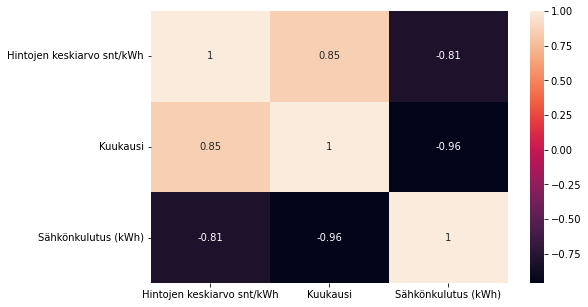

In [18]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(data=dfCorr.corr().round(2),annot=True)
plt.show()

Kovarianssi, eli kuinka läheisesti muuttujat vaihtelevat yhdessä. Näitä voi olla järkevä mitata, koska hinnat ja kulutus ovat samassa yksikössä. Se voi saada joko positiivisen tai negatiivisen arvon. Mitä kauempana kerroin on nollasta, sitä suurempi yhteys arvoilla on ja 0 tarkoittaa, ettei muuttujat liity toisiinsa eikä niiden perusteella kannattaisi ennustaa tulevaisuutta.

In [19]:
kovarianssi = dfCorr.cov()
kovarianssi

,Hintojen keskiarvo snt/kWh,Kuukausi,Sähkönkulutus (kWh)
Hintojen keskiarvo snt/kWh,1.479062e+00,2.221667e+00,-9.502554e+08
Kuukausi,2.221667e+00,4.666667e+00,-1.996614e+09
Sähkönkulutus (kWh),-9.502554e+08,-1.996614e+09,9.211650e+17
